In [22]:
import pandas as pd
from sodapy import Socrata
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import dataframePreparation as u
import seaborn as sns
import numpy as np

yellow_results_df = u.preprocess_data("m6nq-qud6")


In [23]:
yellow_results_df

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,2.5,0.3,11.80,2.5
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.60,1,N,138,132,1,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,2.5,0.3,24.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,1,N,163,239,1,10.0,3.5,0.5,1.00,2.5,0.3,15.30,2.5
999996,1,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,1,N,161,186,1,7.5,3.5,0.5,3.00,2.5,0.3,14.80,2.5
999997,2,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,1,N,162,236,1,7.5,1.0,0.5,2.36,2.5,0.3,14.16,2.5
999998,2,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,1,N,140,43,1,10.0,1.0,0.5,2.86,2.5,0.3,17.16,2.5


deleting unnecessary columns

In [24]:
columns_todrop=["vendorid","ratecodeid","store_and_fwd_flag","extra","mta_tax","tolls_amount","improvement_surcharge","congestion_surcharge","fare_amount","tip_amount"]
yellow_results_df=yellow_results_df.drop(columns_todrop, axis=1)
yellow_results_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,238,151,2,4.30
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,132,165,1,51.95
3,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.60,138,132,1,36.35
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,68,33,1,24.36
...,...,...,...,...,...,...,...,...
999995,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,163,239,1,15.30
999996,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,161,186,1,14.80
999997,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,162,236,1,14.16
999998,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,140,43,1,17.16


deleting negative values and a 0 passenger count and less than 7

In [27]:
yellow_results_df = yellow_results_df[(yellow_results_df['passenger_count']>=1) & (yellow_results_df['passenger_count']<7)]


In [28]:
yellow_results_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,238,151,2,4.30
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,132,165,1,51.95
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,68,33,1,24.36
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,224,68,1,14.15
...,...,...,...,...,...,...,...,...
999995,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,163,239,1,15.30
999996,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,161,186,1,14.80
999997,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,162,236,1,14.16
999998,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,140,43,1,17.16


deleting distance > 100

In [29]:
yellow_results_df = yellow_results_df[(yellow_results_df['trip_distance']<100) & (yellow_results_df['trip_distance']>0.01)]

In [30]:
yellow_results_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,238,151,2,4.30
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,132,165,1,51.95
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,68,33,1,24.36
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,224,68,1,14.15
...,...,...,...,...,...,...,...,...
999995,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,163,239,1,15.30
999996,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,161,186,1,14.80
999997,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,162,236,1,14.16
999998,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,140,43,1,17.16


total amount

In [31]:
yellow_results_df = yellow_results_df[(yellow_results_df['total_amount']>2.5)&(yellow_results_df['total_amount']<100)]

In [32]:
yellow_results_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,238,151,2,4.30
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,132,165,1,51.95
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,68,33,1,24.36
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,224,68,1,14.15
...,...,...,...,...,...,...,...,...
999995,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,163,239,1,15.30
999996,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,161,186,1,14.80
999997,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,162,236,1,14.16
999998,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,140,43,1,17.16


PU/DO IDs

In [33]:
yellow_results_df= yellow_results_df[(yellow_results_df['pulocationid']<263)&(yellow_results_df['pulocationid']>0)]
yellow_results_df= yellow_results_df[(yellow_results_df['dolocationid']<263)&(yellow_results_df['pulocationid']>0)]

In [34]:
yellow_results_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,238,151,2,4.30
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,132,165,1,51.95
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,68,33,1,24.36
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,224,68,1,14.15
...,...,...,...,...,...,...,...,...
999995,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,163,239,1,15.30
999996,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,161,186,1,14.80
999997,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,162,236,1,14.16
999998,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,140,43,1,17.16


first data augmentation: duration

In [35]:
difference =(yellow_results_df.tpep_dropoff_datetime-yellow_results_df.tpep_pickup_datetime)
difference_seconds=difference.dt.total_seconds()
yellow_results_df['duration']= difference_seconds
difference_hours=difference_seconds / 3600
yellow_results_df['durationHours']= difference_hours


duration filter

In [36]:
yellow_results_df=yellow_results_df[(yellow_results_df['durationHours']<4) & (yellow_results_df['duration']>60)]

augmenting the dataframe

In [37]:
import datetime as dt

yellow_results_df['PUDay'] = yellow_results_df['tpep_pickup_datetime'].dt.day_name()
yellow_results_df['DODay'] = yellow_results_df['tpep_dropoff_datetime'].dt.day_name()
yellow_results_df['PUhour'] = yellow_results_df['tpep_pickup_datetime'].dt.hour
yellow_results_df['DOhour'] = yellow_results_df['tpep_dropoff_datetime'].dt.hour
def timezone(x):
    if x>=dt.time(4, 0, 1) and x <=dt.time(10, 0, 0):
        return 'morning'
    elif x>=dt.time(10, 0, 1) and x <=dt.time(16, 0, 0):
        return 'midday'
    elif x>=dt.time(16, 0, 1) and x <=dt.time(22, 0, 0):
        return 'evening'
    elif x>=dt.time(22, 0, 1) or x <=dt.time(4, 0, 0):
        return 'late night'
    
yellow_results_df['PUperiod']=yellow_results_df['tpep_pickup_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


C:\Users\aymen\AppData\Local\Temp\ipykernel_24312\756155443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_results_df['PUDay'] = yellow_results_df['tpep_pickup_datetime'].dt.day_name()
C:\Users\aymen\AppData\Local\Temp\ipykernel_24312\756155443.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_results_df['DODay'] = yellow_results_df['tpep_dropoff_datetime'].dt.day_name()
C:\Users\aymen\AppData\Local\Temp\ipykernel_24312\756155443.py:5: SettingWithCopyWarning: 
A value is trying to be se

In [38]:
yellow_results_df['DOperiod']=yellow_results_df['tpep_dropoff_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


C:\Users\aymen\AppData\Local\Temp\ipykernel_24312\3480313559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_results_df['DOperiod']=yellow_results_df['tpep_dropoff_datetime'].apply(lambda x :timezone(dt.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )


In [39]:
yellow_results_df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount,duration,durationHours,PUDay,DODay,PUhour,DOhour,PUperiod,DOperiod
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80,362.0,0.100556,Friday,Friday,0,0,late night,late night
2,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,132,165,1,51.95,1656.0,0.460000,Friday,Friday,0,1,late night,late night
4,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,68,33,1,24.36,992.0,0.275556,Friday,Friday,0,0,late night,late night
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,224,68,1,14.15,481.0,0.133611,Friday,Friday,0,0,late night,late night
6,2021-01-01 00:00:28,2021-01-01 00:17:28,1,4.10,95,157,2,17.30,1020.0,0.283333,Friday,Friday,0,0,late night,late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021-01-25 17:56:51,2021-01-25 18:08:03,1,2.00,163,239,1,15.30,672.0,0.186667,Monday,Monday,17,18,evening,evening
999996,2021-01-25 17:04:55,2021-01-25 17:14:08,1,0.90,161,186,1,14.80,553.0,0.153611,Monday,Monday,17,17,evening,evening
999997,2021-01-25 17:27:41,2021-01-25 17:34:51,2,1.75,162,236,1,14.16,430.0,0.119444,Monday,Monday,17,17,evening,evening
999998,2021-01-25 17:48:51,2021-01-25 18:01:25,2,1.92,140,43,1,17.16,754.0,0.209444,Monday,Monday,17,18,evening,evening


borough identification

In [40]:
# Identify pickup and dropoff borough
def drop_pick_data(frame):
    zone_df = pd.read_csv('taxi+_zone_lookup.csv')
    zone_df.info()
    data = pd.DataFrame(pd.merge(frame, zone_df[['LocationID', 'Borough']], left_on='pulocationid', right_on='LocationID')).drop('LocationID', axis=1)
    data = data.rename({'Borough':'PUborough'}, axis=1)
    data = pd.DataFrame(pd.merge(data, zone_df[['LocationID', 'Borough']], left_on='dolocationid', right_on='LocationID')).drop('LocationID', axis=1)
    data = data.rename({'Borough':'DOborough'}, axis=1)
    return data
yellow_drop_pick_data= drop_pick_data(yellow_results_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [41]:
yellow_drop_pick_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,payment_type,total_amount,duration,durationHours,PUDay,DODay,PUhour,DOhour,PUperiod,DOperiod,PUborough,DOborough
0,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,142,43,2,11.80,362.0,0.100556,Friday,Friday,0,0,late night,late night,Manhattan,Manhattan
1,2021-01-01 00:55:53,2021-01-01 01:08:15,2,2.73,142,43,1,18.36,742.0,0.206111,Friday,Friday,0,1,late night,late night,Manhattan,Manhattan
2,2021-01-01 01:05:52,2021-01-01 01:13:17,1,1.60,142,43,1,14.15,445.0,0.123611,Friday,Friday,1,1,late night,late night,Manhattan,Manhattan
3,2021-01-01 09:06:48,2021-01-01 09:14:30,1,2.29,142,43,1,14.00,462.0,0.128333,Friday,Friday,9,9,morning,morning,Manhattan,Manhattan
4,2021-01-01 09:47:41,2021-01-01 09:53:41,1,1.45,142,43,1,12.88,360.0,0.100000,Friday,Friday,9,9,morning,morning,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889655,2021-01-12 06:13:31,2021-01-12 06:37:38,1,18.61,11,99,1,65.79,1447.0,0.401944,Tuesday,Tuesday,6,6,morning,morning,Brooklyn,Staten Island
889656,2021-01-13 06:11:16,2021-01-13 06:36:18,1,18.69,11,99,1,65.79,1502.0,0.417222,Wednesday,Wednesday,6,6,morning,morning,Brooklyn,Staten Island
889657,2021-01-14 06:19:13,2021-01-14 06:39:11,1,17.79,11,99,1,63.29,1198.0,0.332778,Thursday,Thursday,6,6,morning,morning,Brooklyn,Staten Island
889658,2021-01-17 14:33:50,2021-01-17 15:22:13,1,20.11,11,99,1,77.79,2903.0,0.806389,Sunday,Sunday,14,15,midday,midday,Brooklyn,Staten Island


C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aymen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCach

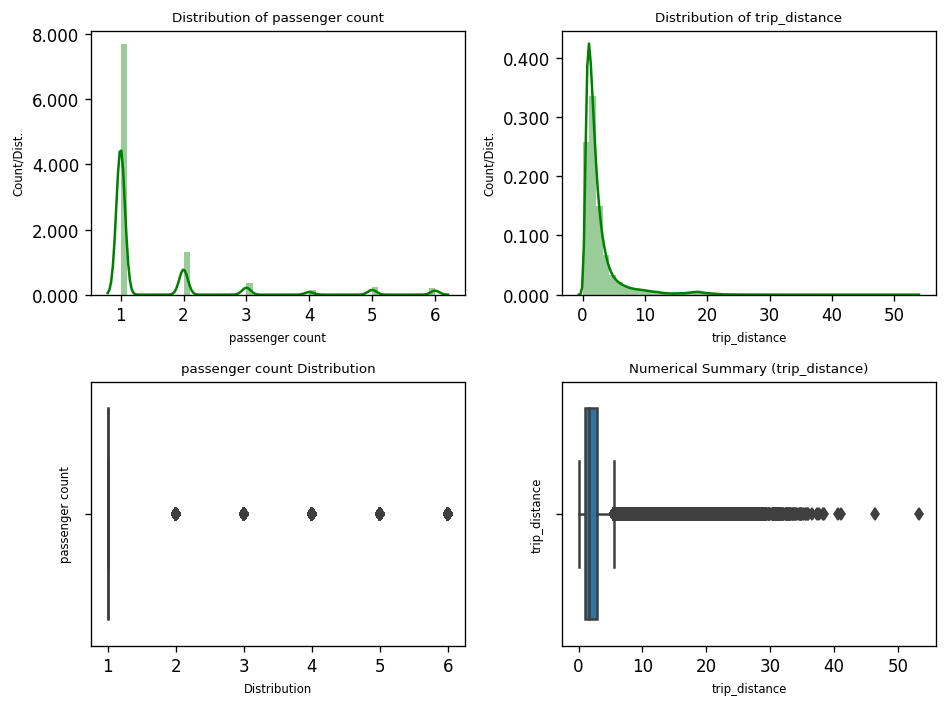

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

#Setting up the frame 
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

#Distribution of passenger_count with displot
plot00=sns.distplot(yellow_drop_pick_data['passenger_count'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of passenger count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('passenger count',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

#Distribution of trip_distance with displot
plot01=sns.distplot(yellow_results_df['trip_distance'],ax=axes[0][1],color='green')
axes[0][1].set_title('Distribution of trip_distance',fontdict={'fontsize':8})
axes[0][1].set_xlabel('trip_distance',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()

#passenger_count-Boxplot
#plot10= sns.boxplot()
plot10=sns.boxplot(x=yellow_results_df['passenger_count'],ax=axes[1][0])
axes[1][0].set_title('passenger count Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Distribution',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'passenger count',fontdict={'fontsize':7})
plt.tight_layout()

#trip_distance-Boxplot
plot11=sns.boxplot(yellow_results_df['trip_distance'],ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (trip_distance)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'trip_distance',fontdict={'fontsize':7})
axes[1][1].set_xlabel('trip_distance',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

C:\Users\aymen\AppData\Local\Temp\ipykernel_24312\1728028048.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

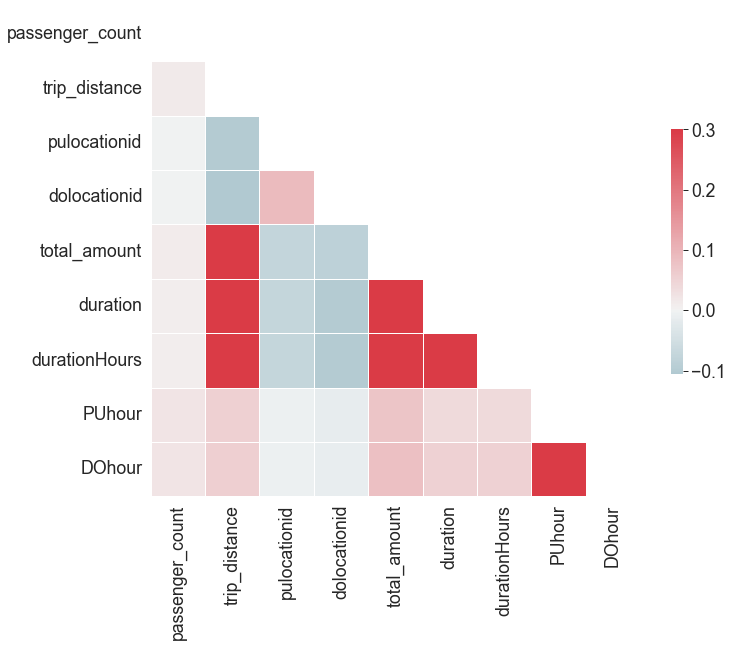

In [44]:
sns.set_style('white')
sns.set_context("paper",font_scale=2)
corr = yellow_results_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidths=0.5, cbar_kws={"shrink":0.5})


## Saving as csv

In [43]:
yellow_drop_pick_data.to_csv('clean.csv',index=False)